# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [6]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [7]:
project_data=pd.read_csv('train_data.csv')
resource_data=pd.read_csv('resources.csv')

## 1.1 Reading Data

In [8]:
project_data['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [9]:
#sampling the dataset for modeling
project_data=project_data.sample(25000)

In [10]:
project_data['project_is_approved'].value_counts()

1    21274
0     3726
Name: project_is_approved, dtype: int64

In [11]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (25000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


## 1.2 preprocessing of `project_subject_categories`

In [12]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [13]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [14]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [15]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
99164,172819,p032734,5b233cf6c0915489b96e383b4eb90df9,Mrs.,NC,2016-05-05 12:59:56,Grades 3-5,It All Adds Up: Math Mastery for ELLs,"I am an elementary ESL Teacher, which means th...",I currently work with students who speak Karen...,My student will use these materials to investi...,"In elementary school, we learn the basics to h...",My students need supplies to support their mas...,0,0,Literacy_Language Math_Science,ESL Mathematics,"I am an elementary ESL Teacher, which means th..."
101903,47451,p128625,874eb6835c14a9393cee62411e41bc01,Ms.,NY,2017-03-07 17:58:58,Grades 3-5,Help Us Jump Back in History!,Our students love to learn! They dive into co...,My students want to travel back in time but we...,NaN,NaN,My students need historical fiction books that...,10,1,Literacy_Language,ESL Literacy,Our students love to learn! They dive into co...


## Number of words in title

In [16]:
words_count_title=[]
for i in project_data["project_title"] :
    n = len(i.split())
    words_count_title.append(n)
project_data["words_count_title"] = words_count_title

In [17]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)

I am an elementary ESL Teacher, which means that I have the unique opportunity to work with children from around the world! I work with immigrants, refugees, and students born in the United States who speak a language other than English at home.I currently work with students who speak Karen, Karenni, Shan, Chin, Burmese, Arabic, Nepali, Mon, Jarai, Pashto, and Spanish at home while they learn the academic and social English they need to excel in school. My students are eager to learn about the world around them as well the English and skills necessary to become active and positive members of the global community. I teach over 70 English Language Learns between two different schools. Both schools are Title 1 Schools with high populations of students receiving free and reduced lunch.My student will use these materials to investigate the world of mathematics. Elementary school provides the foundations for a lifetime of learning math in the classroom and applying that knowledge in the real

In [18]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My students come to 4th grade excited and wanting to learn. I want to provide a new classroom environment that will allow their personal differences to thrive with choices of seating and tables best suited to their learning styles. I work in a school that does not receive additional funds since we are not a title 1 school so many times it is me spending money to support and pay for new materials and ideas. I have taught a long time but am always excited to provide a safe place that will provide them the most beneficial place to learn. I am looking forward to a new year and would like to start off with all of the supplies that my students need.These materials will help to ensure my students success by making sure that they have everything they need to complete assignments. \r\nStudents are not always able to bring their own supplies. At our school, we have several district transfers. We have students coming from lower income areas. They need to be successful to no matter what their situ

In [20]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My students come to 4th grade excited and wanting to learn. I want to provide a new classroom environment that will allow their personal differences to thrive with choices of seating and tables best suited to their learning styles. I work in a school that does not receive additional funds since we are not a title 1 school so many times it is me spending money to support and pay for new materials and ideas. I have taught a long time but am always excited to provide a safe place that will provide them the most beneficial place to learn. I am looking forward to a new year and would like to start off with all of the supplies that my students need.These materials will help to ensure my students success by making sure that they have everything they need to complete assignments.   Students are not always able to bring their own supplies. At our school, we have several district transfers. We have students coming from lower income areas. They need to be successful to no matter what their situat

In [21]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students come to 4th grade excited and wanting to learn I want to provide a new classroom environment that will allow their personal differences to thrive with choices of seating and tables best suited to their learning styles I work in a school that does not receive additional funds since we are not a title 1 school so many times it is me spending money to support and pay for new materials and ideas I have taught a long time but am always excited to provide a safe place that will provide them the most beneficial place to learn I am looking forward to a new year and would like to start off with all of the supplies that my students need These materials will help to ensure my students success by making sure that they have everything they need to complete assignments Students are not always able to bring their own supplies At our school we have several district transfers We have students coming from lower income areas They need to be successful to no matter what their situation Having 

In [22]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

## Preprocessing Train data (Essays)

In [23]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 25000/25000 [00:13<00:00, 1852.69it/s]


## Preprocessing Train data (Titles)


In [24]:
preprocessed_titles_train=[]
for title in tqdm(project_data['project_title'].values):
    title = decontracted(title)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    # https://gist.github.com/sebleier/554280
    title = ' '.join(e for e in title.split() if e not in stopwords)
    preprocessed_titles_train.append(title.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 41860.67it/s]


In [25]:
project_data_copy=project_data
y_project=project_data['project_is_approved']
project_data=project_data.drop(['project_is_approved'],axis=1)

## 1.5 Preparing data for models

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'words_count_title'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

**Vectorizing Categories**

In [27]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_cat = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_cat.fit_transform(project_data['clean_categories'].values)
print(vectorizer_cat.get_feature_names())
print("Shape of matrix after one hot encoding ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encoding  (25000, 9)


**Vectorizing SubCategories**

In [28]:
# we use count vectorizer to convert the values into one 
vectorizer_subcat = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_subcat.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer_subcat.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'ESL', 'Health_LifeScience', 'EarlyDevelopment', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (25000, 30)


**Vectorizing School State**

In [29]:
mycounter = Counter()
for word in project_data['school_state'].values:
    mycounter.update(word.split())

In [30]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
s_dict = dict(mycounter)
sorted_s_dict = dict(sorted(s_dict.items(), key=lambda kv: kv[1]))

In [31]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_state = CountVectorizer(vocabulary=list(sorted_s_dict.keys()), lowercase=False, binary=True)
state_one_hot=vectorizer_state.fit_transform(project_data['school_state'].values)

print(vectorizer_state.get_feature_names())

print("Shape of matrix after one hot encodig ",state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'SD', 'RI', 'NE', 'AK', 'NH', 'DE', 'WV', 'HI', 'ME', 'NM', 'DC', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'NV', 'KY', 'MS', 'MD', 'TN', 'UT', 'CT', 'WI', 'AL', 'VA', 'AZ', 'NJ', 'MA', 'WA', 'LA', 'OK', 'OH', 'MO', 'IN', 'MI', 'PA', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (25000, 51)


**Vectorizing project_grade_category**

In [32]:
my_t_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_t_counter.update(word.split())

In [33]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
t_dict = dict(my_t_counter)
del t_dict['Grades'] # Deleting unnecessary point 'Grades'
sorted_t_dict = dict(sorted(t_dict.items(), key=lambda kv: kv[1]))

In [34]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_grade = CountVectorizer(vocabulary=list(sorted_t_dict.keys()), lowercase=False, binary=True)
grade_one_hot=vectorizer_grade.fit_transform(project_data['project_grade_category'].values)

print(vectorizer_grade.get_feature_names())

print("Shape of matrix after one hot encodig ",grade_one_hot.shape)


['9-12', '6-8', '3-5', 'PreK-2']
Shape of matrix after one hot encodig  (25000, 4)


**Vectorizing teacher_prefix**

In [35]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna("")

my_g_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_g_counter.update(str(word).split())

In [36]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
g_dict = dict(my_g_counter)
sorted_g_dict = dict(sorted(g_dict.items(), key=lambda kv: kv[1]))

In [37]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_teach = CountVectorizer(vocabulary=list(sorted_g_dict.keys()), lowercase=False, binary=True)
teacher_one_hot=vectorizer_teach.fit_transform(project_data['teacher_prefix'].values)

print(vectorizer_teach.get_feature_names())

print("Shape of matrix after one hot encodig ",teacher_one_hot.shape)


['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (25000, 5)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [38]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_essay = CountVectorizer(min_df=10)
vectorizer_bow_essay.fit(preprocessed_essays_train)
text_bow = vectorizer_bow_essay.transform(preprocessed_essays_train)

print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (25000, 9180)


In [39]:
# Calculating BOW of titles
vectorizer_bow_title = CountVectorizer()
titlebow = vectorizer_bow_title.fit_transform(preprocessed_titles_train)

print("Shape of matrix after one hot encodig ",titlebow.shape)


Shape of matrix after one hot encodig  (25000, 8511)


### 1.5.3 Vectorizing Numerical features

In [40]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
data = pd.merge(project_data, price_data, on='id', how='left')

In [41]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(data['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 

normalizer.fit(data['price'].values.reshape(-1,1))

price = normalizer.transform(data['price'].values.reshape(-1,1))

print(price.shape)


(25000, 1)


**Number of projects teacher previously posted projects**

In [42]:
import warnings
warnings.filterwarnings("ignore")
normalizer = Normalizer()
teacher=normalizer.fit_transform(data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(teacher.shape)


(25000, 1)


In [43]:
normalizer = Normalizer()
normalizer.fit(data['words_count_title'].values.reshape(-1,1))

words_count_title = normalizer.transform(data['words_count_title'].values.reshape(-1,1))


print(words_count_title.shape)


(25000, 1)


# Assignment 10: Clustering



- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

## Data Matrix using BOW

In [44]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
final_data = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price,titlebow,teacher_one_hot,teacher,grade_one_hot,state_one_hot)).tocsr()

print(final_data.shape)


(25000, 17792)


#### Selecting top 5k features from Data matrix

In [45]:
from sklearn.feature_selection import SelectKBest, chi2
bestK=SelectKBest(chi2, k=5000).fit(final_data, y_project)
final_data = bestK.transform(final_data)
final_data=final_data.toarray()
print(final_data.shape)

(25000, 5000)


## K Means on Data Matrix

100%|██████████| 9/9 [20:42<00:00, 177.90s/it]


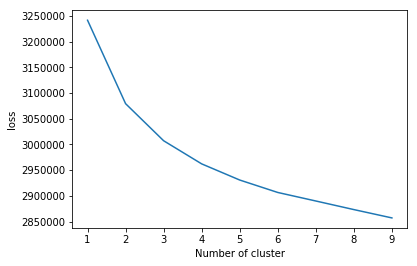

In [45]:
#taken from https://github.com/xSachinBharadwajx/Donors_Choose_Clustering_Models

from sklearn.cluster import KMeans

loss = []
k=range(1, 10)

for k in tqdm(k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(final_data)
    loss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 10), loss)
plt.xlabel("Number of cluster")
plt.ylabel("loss")
plt.show()

### Best k is observed to be 3

In [46]:
#Perfoming kmeans with best k
kmeans = KMeans(n_clusters=3)
kmeans.fit(final_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#Distributing different datapoints to respective clusters
cluster_1=[]
cluster_2=[]
cluster_3=[]

for i in range(final_data.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster_1.append(project_data_copy.iloc[i])
    elif kmeans.labels_[i] == 1:
        cluster_2.append(project_data_copy.iloc[i])
    else:
        cluster_3.append(project_data_copy.iloc[i])
   

### Calculating positive & negative datapoints in different clusters

In [48]:
pos=0
neg=0
tt=len(cluster_1)
for i in cluster_1:
    if i['project_is_approved']==1:
        pos=pos+1
    else:
        neg=neg+1

print("Projects Approved %age in cluster 1 ",(pos/tt*100))
print("Projects Not Approved %age in cluster 1 ",(neg/tt*100))

Projects Approved %age in cluster 1  89.47368421052632
Projects Not Approved %age in cluster 1  10.526315789473683


In [49]:
pos=0
neg=0
tt=len(cluster_2)
for i in cluster_2:
    if i['project_is_approved']==1:
        pos=pos+1
    else:
        neg=neg+1

print("Projects Approved %age in cluster 1 ",(pos/tt*100))
print("Projects Not Approved %age in cluster 1 ",(neg/tt*100))

Projects Approved %age in cluster 2  82.94000147961826
Projects Not Approved %age in cluster 2  17.059998520381743


In [55]:
pos=0
neg=0
tt=len(cluster_3)
for i in cluster_3:
    if i['project_is_approved']==1:
        pos=pos+1
    else:
        neg=neg+1

print("Projects Approved %age in cluster 1 ",(pos/tt*100))
print("Projects Not Approved %age in cluster 1 ",(neg/tt*100))

Projects Approved %age in cluster 2  86.02516150969059
Projects Not Approved %age in cluster 2  13.974838490309418


### WordCloud for different essays of different clusteres

Do you remember the book you read that made you fall in love with reading? That book, that poem, that discussion that made you dive in deeper? My students LOVE close reading texts, they love books, they love authors, and they love words. My students are constantly devouring books.My students are part of an exciting adventure. They will be going to a brand spanking new school. At this new school we will have a diverse community blending together for the very first time. These students are leaving the comfort of their previous school and taking a step out to explore and set up a culture for our new community. Our school will have a focus on STEM education and be pushed to develop 21st century skills. My students will be encouraged and pushed to be collaborators, cross-cultural communicators, team members, kids that have resiliency and adaptability. They are in for an exciting year and I can't wait to help facilitate their journey in our classroom.We are fortunate enough to be a \"project

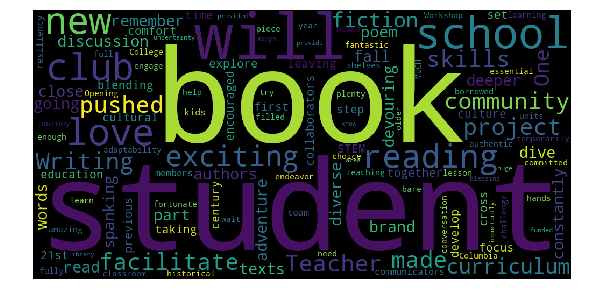

In [50]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud
essay_fp_str=cluster_1[0]['essay']

print(essay_fp_str)
print("*"*50)

wordcloud = WordCloud(width = 1000, height = 500).generate(essay_fp_str)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
   
plt.show()

It's the end of the school year. Routines have run their course, and students are in need of a boost in the curriculum. Enter the Breakout Box! My students can prove their knowledge of content by solving riddles and finding clues that lead them to unlocking the box for the prize.My students desire challenges, movement, and collaboration. They thrive on rigor, but are far more successful with content that is engaging and rich, but still fun. My students have been working and developing on who they are as teammates, and how one works best in a group. I work at a school that holds the bar for student achievement very high, and I would like to raise that bar even further with a Breakout Box.I will design different clues using specific content knowledge to get students to solve puzzles in search of unlocking the Breakout Box. This activity can be used in all subject areas and have students working in teams, whole class, or even individually. I will be able to use these materials year round 

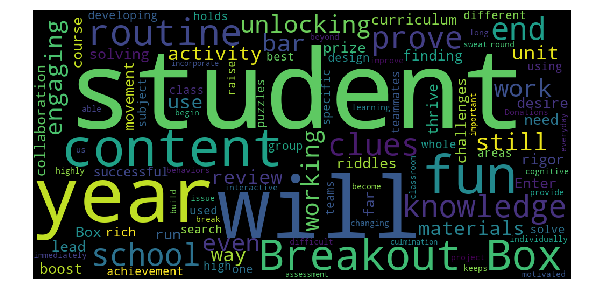

In [51]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud
essay_fp_str=cluster_2[0]['essay']
print (essay_fp_str)
wordcloud = WordCloud(width = 1000, height = 500).generate(essay_fp_str)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Never has society so rapidly changed. Technology invades every corner of our lives. How can we pretend to educate the citizens of tomorrow without the proper equipment?Our Language Arts and Social Justice Magnet School emphasizes the respect of self and others.  This encompasses discipline and high expectations as well as activism and compassion. The kids know they will be Agents of Change and follow our school motto \"Be the change you want to see in the world.\" Unfortunately, more than 75% of our students come from economically disadvantaged families and parents can't step in to help financially.\"Is it my turn, Ms. K? When am I going to be able to go to our site, Ms. K?\" My second grade students sometimes wait two or three days before being able to create documents, practice their skills with the games I designed, or complete a research project. They need new technology!   An iPad mini will enable students to access our class qr codes and website where I posted my video-lessons fo

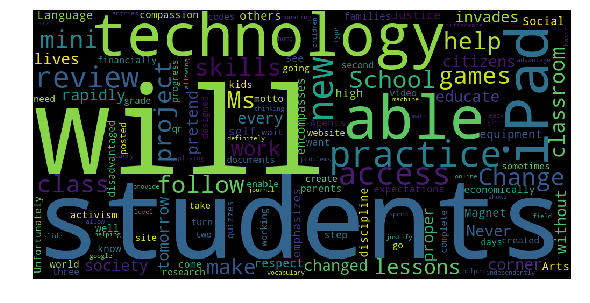

In [56]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud
essay_fp_str=cluster_3[0]['essay']
print (essay_fp_str)
wordcloud = WordCloud(width = 1000, height = 500).generate(essay_fp_str)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Calculating most common words in all the respective clusters

In [52]:
#https://www.geeksforgeeks.org/find-k-frequent-words-data-set-python/
# Python program to find the k most frequent words 
# from data set 
from collections import Counter 
data_set=[]
data=[]
for i in range(len(cluster_1)):
    data.append(cluster_1[i]['essay'])
 
   
for sentance in (data):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    data_set.append(sent.lower().strip())
    
data_set=" ".join(data_set)

# split() returns list of all the words in the string 
split_it = data_set.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(4) 
  
print(most_occur) 

[('students', 19946), ('reading', 10910), ('books', 9384), ('read', 5771)]


In [53]:
#https://www.geeksforgeeks.org/find-k-frequent-words-data-set-python/
# Python program to find the k most frequent words 
# from data set 
from collections import Counter 
data_set=[]
data=[]
for i in range(len(cluster_2)):
    data.append(cluster_2[i]['essay'])
 
   
for sentance in (data):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    data_set.append(sent.lower().strip())
    
data_set=" ".join(data_set)

# split() returns list of all the words in the string 
split_it = data_set.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(4) 
  
print(most_occur) 

[('students', 70604), ('school', 29644), ('learning', 18916), ('classroom', 17716)]


In [54]:
#https://www.geeksforgeeks.org/find-k-frequent-words-data-set-python/
# Python program to find the k most frequent words 
# from data set 
from collections import Counter 
data_set=[]
data=[]
for i in range(len(cluster_3)):
    data.append(cluster_3[i]['essay'])
 
   
for sentance in (data):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    data_set.append(sent.lower().strip())
    
data_set=" ".join(data_set)

# split() returns list of all the words in the string 
split_it = data_set.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(4) 
  
print(most_occur) 

[('students', 91184), ('school', 22668), ('learning', 18524), ('classroom', 16823)]


## Observations:
**We can see that all 3 clusters have around 85% positive and 15% negative points**

**Most frequent words in cluster 1 are "students","reading," "books"**

**Most frequent words in cluster 2 and 3 are almost similar**

## Agglomerative Clustering on Data Matrix

In [57]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3)
model.fit(final_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [0]:
#Distributing different datapoints to respective clusters
cluster_1=[]
cluster_2=[]
cluster_3=[]

for i in range(final_data.shape[0]):
    if model.labels_[i] == 0:
        cluster_1.append(project_data_copy.iloc[i])
    elif model.labels_[i] == 1:
        cluster_2.append(project_data_copy.iloc[i])
    else :
        cluster_3.append(project_data_copy.iloc[i])

### Calculating positive & negative datapoints in different clusters

In [59]:
pos=0
neg=0
tt=len(cluster_1)
for i in cluster_1:
    if i['project_is_approved']==1:
        pos=pos+1
    else:
        neg=neg+1

print("Projects Approved %age in cluster 1 ",(pos/tt*100))
print("Projects Not Approved %age in cluster 1 ",(neg/tt*100))

Projects Approved %age in cluster 1  84.99942283273693
Projects Not Approved %age in cluster 1  15.000577167263074


In [60]:
pos=0
neg=0
tt=len(cluster_2)
for i in cluster_2:
    if i['project_is_approved']==1:
        pos=pos+1
    else:
        neg=neg+1

print("Projects Approved %age in cluster 1 ",(pos/tt*100))
print("Projects Not Approved %age in cluster 1 ",(neg/tt*100))

Projects Approved %age in cluster 2  88.75739644970415
Projects Not Approved %age in cluster 2  11.242603550295858


In [61]:
pos=0
neg=0
tt=len(cluster_3)
for i in cluster_3:
    if i['project_is_approved']==1:
        pos=pos+1
    else:
        neg=neg+1

print("Projects Approved %age in cluster 1 ",(pos/tt*100))
print("Projects Not Approved %age in cluster 1 ",(neg/tt*100))

Projects Approved %age in cluster 3  80.43782021425244
Projects Not Approved %age in cluster 3  19.562179785747556


### WordCloud for different essays of different clusteres

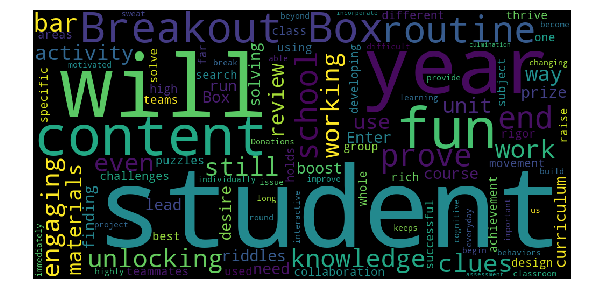

In [62]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud
essay_fp_str=cluster_1[0]['essay']
wordcloud = WordCloud(width = 1000, height = 500).generate(essay_fp_str)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

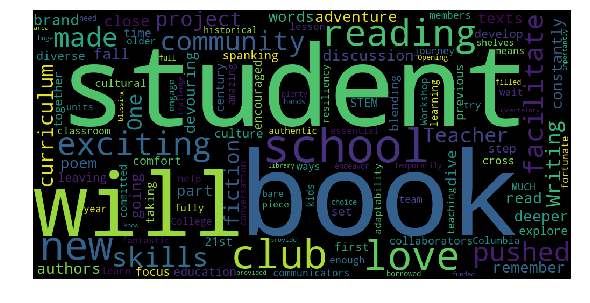

In [63]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud
essay_fp_str=cluster_2[0]['essay']
wordcloud = WordCloud(width = 1000, height = 500).generate(essay_fp_str)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

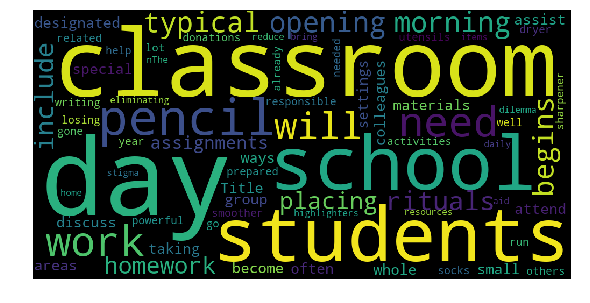

In [64]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud
essay_fp_str=cluster_3[0]['essay']
wordcloud = WordCloud(width = 1000, height = 500).generate(essay_fp_str)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Calculating most common words in all the respective clusters

In [65]:
#https://www.geeksforgeeks.org/find-k-frequent-words-data-set-python/
# Python program to find the k most frequent words 
# from data set 
from collections import Counter 
data_set=[]
data=[]
for i in range(len(cluster_1)):
    data.append(cluster_1[i]['essay'])
 
   
for sentance in (data):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    data_set.append(sent.lower().strip())
    
data_set=" ".join(data_set)

# split() returns list of all the words in the string 
split_it = data_set.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(4) 
  
print(most_occur) 

[('students', 139964), ('school', 41112), ('learning', 31262), ('classroom', 29239)]


In [66]:
#https://www.geeksforgeeks.org/find-k-frequent-words-data-set-python/
# Python program to find the k most frequent words 
# from data set 
from collections import Counter 
data_set=[]
data=[]
for i in range(len(cluster_2)):
    data.append(cluster_2[i]['essay'])
 
   
for sentance in (data):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    data_set.append(sent.lower().strip())
    
data_set=" ".join(data_set)

# split() returns list of all the words in the string 
split_it = data_set.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(4) 
  
print(most_occur) 

[('students', 23486), ('reading', 11169), ('books', 9652), ('school', 7165)]


In [67]:
#https://www.geeksforgeeks.org/find-k-frequent-words-data-set-python/
# Python program to find the k most frequent words 
# from data set 
from collections import Counter 
data_set=[]
data=[]
for i in range(len(cluster_3)):
    data.append(cluster_3[i]['essay'])
 
   
for sentance in (data):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    data_set.append(sent.lower().strip())
    
data_set=" ".join(data_set)

# split() returns list of all the words in the string 
split_it = data_set.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(4) 
  
print(most_occur) 

[('students', 18284), ('school', 9718), ('learning', 5536), ('not', 4894)]


## Observations:
**We can see that all 3 clusters have around 80-90% positive and 10-20% negative points**

**Most frequent words in cluster 1 are "students","school," "classroom"**

**Most frequent words in cluster 2 are "students","reading," "books" , "school"**

**Most frequent words in cluster 3 are "students","school," "learning", "not"**

## DBSCAN Clustering on Data Matrix

**Considering minimum points = 5**

100%|██████████| 25000/25000 [4:21:17<00:00,  1.60it/s]


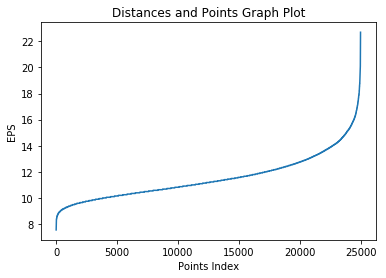

In [68]:
min_pts=5
Kth_dist=[]
dist_ = []

for row in tqdm(final_data):
    row_distance = np.sort(np.sum((final_data - row)**2,axis=1),axis=None)
    dist_.append(row_distance[n])
  
 
Kth_dist=np.sort(np.sqrt(np.array(dist_)))

points = [x for x in range(final_data.shape[0])]

# By Elbow method:

plt.plot(points, Kth_dist)
plt.xlabel('Points Index')
plt.ylabel('EPS')
plt.title('Distances and Points Graph Plot')
plt.show()

**From the above graph we can observe best eps to be 15**

In [69]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
from sklearn.cluster import DBSCAN
eps=15
model = DBSCAN(eps=eps,min_samples=5)
model.fit(final_data)

DBSCAN(algorithm='auto', eps=15, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [70]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
# Number of clusters in labels, ignoring noise if present.

labels=model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 761


In [0]:
#Distributing different datapoints to respective clusters
cluster_1=[]
cluster_2=[]

for i in range(final_data.shape[0]):
    if model.labels_[i] == 0:
        cluster_1.append(project_data_copy.iloc[i])
    else :
        pass

### Calculating positive & negative datapoints in different clusters

In [74]:
pos=0
neg=0
tt=len(cluster_1)
for i in cluster_1:
    if i['project_is_approved']==1:
        pos=pos+1
    else:
        neg=neg+1

print("Projects Approved %age in cluster 1 ",(pos/tt*100))
print("Projects Not Approved %age in cluster 1 ",(neg/tt*100))

Projects Approved %age in cluster 1  84.51256239943892
Projects Not Approved %age in cluster 1  15.48743760056108


### WordCloud for different essays of different clusteres

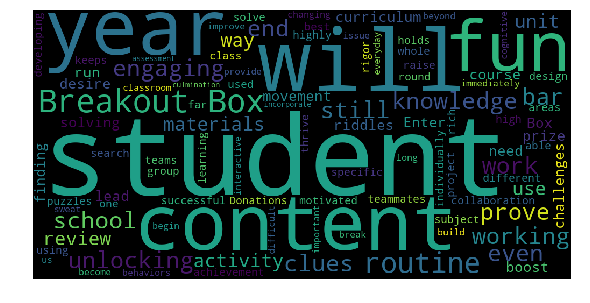

In [75]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud
essay_fp_str=cluster_1[0]['essay']
wordcloud = WordCloud(width = 1000, height = 500).generate(essay_fp_str)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Calculating most common words in all the respective clusters

In [76]:
#https://www.geeksforgeeks.org/find-k-frequent-words-data-set-python/
# Python program to find the k most frequent words 
# from data set 
from collections import Counter 
data_set=[]
data=[]
for i in range(len(cluster_1)):
    data.append(cluster_1[i]['essay'])
 
   
for sentance in (data):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    data_set.append(sent.lower().strip())
    
data_set=" ".join(data_set)

# split() returns list of all the words in the string 
split_it = data_set.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(4) 
  
print(most_occur) 

[('students', 172927), ('school', 55802), ('learning', 38299), ('classroom', 36768)]


## Observations:
**We can see that the cluster have around 85% positive and 15% negative points**

**Most frequent words in cluster 1 are "students" , "school," "learning", "classroom"**

## Conclusion

In [77]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

pt = PrettyTable()
pt.field_names = ["Vectorizer", "Model","No. of clusters", "Hyperparameters(max depth,min samples split)"]

pt.add_row(["BOW", "K Means","3","k=3"])
pt.add_row(["BOW", "Hierarchical clustering","3","-"])
pt.add_row(["BOW", "DBSCAN","1" ,"eps=15,min_pts=5"])

print(pt)

+------------+-------------------------+-----------------+----------------------------------------------+
| Vectorizer |          Model          | No. of clusters | Hyperparameters(max depth,min samples split) |
+------------+-------------------------+-----------------+----------------------------------------------+
|    BOW     |         K Means         |        3        |                     k=3                      |
|    BOW     | Hierarchical clustering |        3        |                      -                       |
|    BOW     |          DBSCAN         |        1        |               eps=15,min_pts=5               |
+------------+-------------------------+-----------------+----------------------------------------------+
